<a href="https://colab.research.google.com/github/gilesitorr/Estadistica_Avanzada/blob/main/Parcial_1/EA_parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Estadística Avanzada__
# Parcial 1
## _Gil Estéfano Rodríguez Rivera_

__Nota:__ En este Notebook se usó el kernel de R, aunque la extensión sea ipynb.

## Pregunta 1

Define analysis of variance. What is an ANOVA table? 

Son métodos que buscan estudiar la relación entre variables categóricas y numéricas. Y los efectos que las primeras pueden inducir en las segundas.

Una tabla ANOVA muestra un resumen del análisis de varianza. Muestra los errores entre los promedios de las muestras, las desvaciones que hay dentro de cada muestra así como los valores de los estadísticos de prueba que se calculan con los distintos pares de errores.

## 4

__Type 1 error__

El error derivado de rechazar una hipótesis nula verdadera


__Type 2 error__

El error derivado de no rechazar una hipótesis nula falsa

__The power of a test__

Es la probabilidad complementaria de la probabilidad de cometer un error de tipo 2. Es decir, es la probabilidad de rechazar (correctamente) una hipótesis nula que es falsa.

__Power function__

Es el complemento de la potencia. Este valor muestra la probabilidad de cometer un error de tipo 2 en una prueba de hipótesis para distintos valores del promedio de una muestra alternativa a la de la muestra original.

__Power curve__

Es una curva que muestra la potencia de una prueba de hipótesis para distintos valores del promedio de una muestra alternativa a la de la muestra original. Es decir, es la gráfica de la función de potencia.

__Operating characteristic curve__

Es similar a la power curve pero grafica la probabilidad de rechazar correctamente una hipótesis nula falsa.

## 5

__Reliability coefficient__

Es el valor de la distribución estandarizada (ya sea la z, la t, la chi cuadrada, la F, etc) que se asocia al coeficiente de confianza que se desea.


__Confidence coefficient__

En el sentido práctico, es el valor entre 1 y 0 que determina cuánta certeza hay de que el parámetro real que se está estimando se encuentre dentro del intervalo de confianza. El intervalo se define como:

estimador +/- ( coeficiente de confiabilidad )x( error estándar )

__Precision__

Es la distancia del estimador hacia uno de los extremos del intervalo de confianza:

precisión = ( coeficiente de confiabilidad )x( error estándar de la media )

__Standard error__

Es la desviación estándar de un estimador. Es decir, es una medida de la dispersión de la muestra en torno a ese estadístico.

__Estimator__

Es una regla que indica cómo estimar un parámetro. Puede haber diversos estimadores para calcular un mismo parámetro.

__Margin error__

Es un sinónimo de la precisión.

## 9

In testing a hypothesis about the difference between two population means, what is the rationale behind pooling the sample variances?

Se supone que ambas muestras de estudio vienen de poblaciones normalmente distribuidas. Entonces, tiene sentido que si son distribuciones iguales, la diferencia entre las desviaciones se deba a factores como el tamaño de la muestra. Por eso, se calcula una desviación que sea un promedio ponderado de las desviaciones de cada muestra individual y su tamaño (a mayor tamaño de muestra, la desviación es más representativa de la población).

## 11

What is the finite population correction? When can it be ignored?

El cálculo del tamaño de población más elemental parte de suponer que se tienen poblaciones grandes (o infinitas, en el sentido práctico). En éstas, se supone que los muestreos sin reemplazo no suponen un traslape de datos en distintas muestras. Es decir, es un método que funciona cuando se tiene certeza de que un mismo elemento no va a aparecer en dos muestras diferentes. Esta fórmula no depende del tamaño de la población (pues éste no tiene efecto al ser infinito).

Cuando no se puede asegurar lo último, es decir, cuando la muestra es suficientemente pequeña (o finita), se utiliza una corrección para el cálculo de la muestra. Esa corrección depende del tamaño de la población.


## 6.10.7

__Measurements of gastric secretion of hydrochloric acid (milliequivalents per hour) in 16 normal subjects and 10 subjects with duodenal ulcer yielded the following results:__

Normal subjects: 6.3, 2.0, 2.3, 0.5, 1.9, 3.2, 4.1, 4.0, 6.2, 6.1, 3.5, 1.3, 1.7, 4.5, 6.3, 6.2

Ulcer subjects: 13.7, 20.6, 15.9, 28.4, 29.4, 18.4, 21.1, 3.0, 26.2, 13.0

__Construct a 95 percent confidence interval for the ratio of the two population variances.__

__What assumptions must be met for this procedure to be valid?__

In [1]:
#Los datos de las dos muestras
data.1 <- c(6.3, 2.0, 2.3, 0.5, 1.9, 3.2, 4.1, 4.0,
            6.2, 6.1, 3.5, 1.3, 1.7, 4.5, 6.3, 6.2)
data.2 <- c(13.7, 20.6, 15.9, 28.4, 29.4,
            18.4, 21.1, 3.0, 26.2, 13.0)

#El tamaño
n.1 <- length(data.1)
n.2 <- length(data.2)

#Las varianzas
var.1 <- var(data.1)
var.2 <- var(data.2)

#La proproción de las varianzas
var.proportion <- var.2/var.1

In [2]:
alpha <- 0.05 #Significancia deseada

f.value.down <- qf(1-alpha/2, df1 = n.2-1, df2 = n.1-1) #Valor de F_{1-\alpha/2}
f.value.up <- qf(alpha/2, df1 = n.2-1, df2 = n.1-1) #Valor de F_{\alpha/2}

In [3]:
confidence.up <- var.proportion/f.value.up #Intervalo superior
confidence.down <- var.proportion/f.value.down #Intervalo inferior

El intervalo de confianza y la proporción obtenida:

In [4]:
print("Cota inferior / Proporción / Cota superior")
print(paste(round(confidence.down, 4), round(var.proportion, 4),
            round(confidence.up, 4)))

[1] "Cota inferior / Proporción / Cota superior"
[1] "5.1219 15.9942 60.2878"


Se infiere que, con 95% de confianza, las varianzas son distintas (porque el itervalo no contiene a 1)

Para el análisis, se debe suponer antes que las varianzas muestrales de ambas muestras provienen de muestras independientes. Ademas, se supone que ambas muestras provienen de poblaciones que siguen una distribución normal.

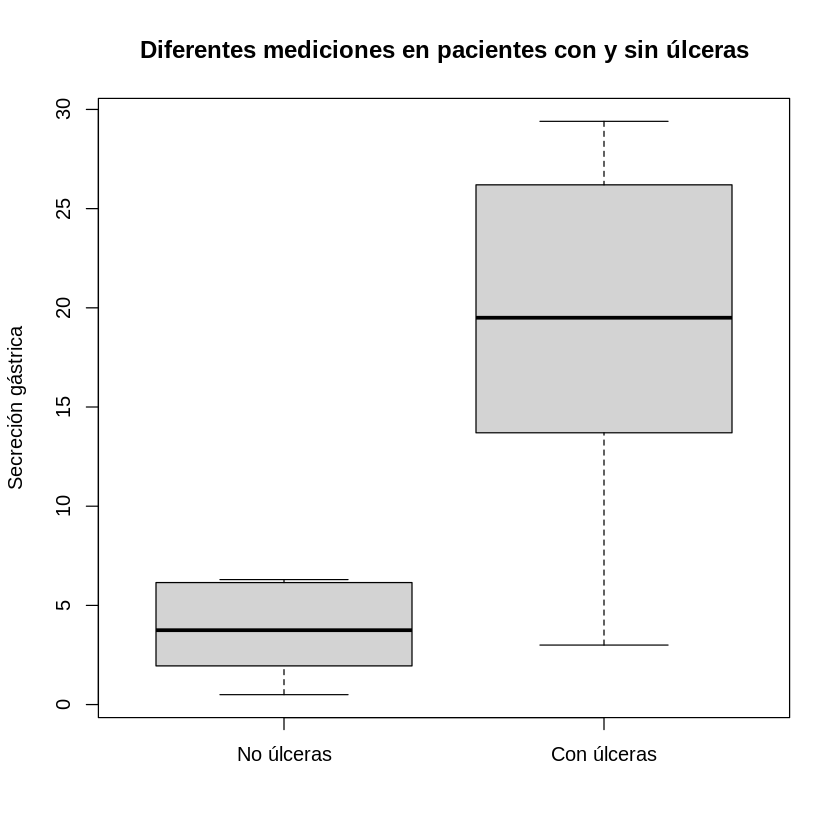

In [5]:
boxplot(data.1, data.2, main="Diferentes mediciones en pacientes con y sin úlceras", ylab="Secreción gástrica", names = c("No úlceras", "Con úlceras"))

## 7.4.5

__One of the purposes of an investigation by Porcellini et al. (A-19) was to investigate the effect on CD4 T cell count of administration of intermittent interleukin (IL-2) in addition to highly active antiretroviral therapy (HAART). The following table shows the CD4 T cell count at baseline and then again after 12 months of HAART therapy with IL-2. Do the data show, at the .05 level, a significant change in CD4 T cell count?__

_Muestra 1_: 173 58 103 181 105 301 169

_Muestra 2_: 257 108 315 362 141 549 369

In [6]:
# Muestras
data.1 <- c(173, 58, 103, 181, 105, 301, 169)
data.2 <- c(257, 108, 315, 362, 141, 549, 369)

# Se usará diferencia a pares
# (porque estamos estudiando los mismos sujetos antes y después de un procedimiento)
differ <- data.1-data.2

# Estadísticos
mean <- mean(differ)
var <- var(differ)
n <- length(differ)

# p-value pruea t
round(pt(mean/sqrt(var/n), df=n-1), 4)

[1] 0.0021

Como el p-value es menor que 0.025 (significancia/2, porque es una prueba bilateral), se infiere que sí hay diferencia entre antes y después del tratamiento en el conteo de células.

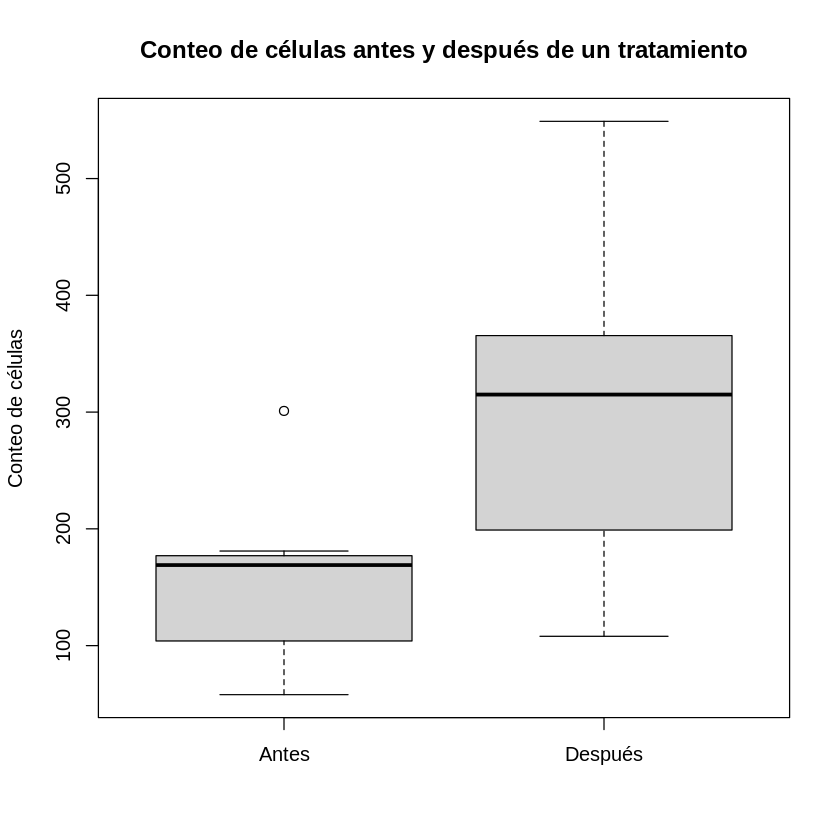

In [7]:
boxplot(data.1, data.2, main="Conteo de células antes y después de un tratamiento", ylab="Conteo de células", names = c("Antes", "Después"))

## 25

__The following table shows the vital capacity measurements of 60 adult males classified by occupation and age group:__

(Los datos están en [GitHub](https://github.com/gilesitorr/Estadistica_Avanzada/tree/main/Parcial_1))

In [14]:
library(tidyverse) # Para leer datos
library(dplyr) # Para filtrar datos

In [15]:
# Se lee la base de datos
df <- read_csv("REV_C08_25.csv")
colnames(df) <- c("VC", "AGEGROUP", "OCC")

Rows: 60 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): OCC
dbl (2): VC, AGEGROUP


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [16]:
summary(aov(VC ~ AGEGROUP*OCC, data=df))

             Df Sum Sq Mean Sq F value   Pr(>F)    
AGEGROUP      1  1.201   1.201   2.429   0.1252    
OCC           3 19.779   6.593  13.340 1.41e-06 ***
AGEGROUP:OCC  3  4.411   1.470   2.975   0.0399 *  
Residuals    52 25.700   0.494                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Puede verse que no hay diferencias entre grupos de edad. Hay una diferencia estadísticamente significativa, con significancia de 0.05, entre las distintas ocupaciones así como en la interacción entre grupos de edad y ocupaciones (sin embargo, el efeccto del término de la interacción es considerablemente menor al de las puras ocupaciones).

Esto es incorrecto. El error puede verse en que los graados de libertaad del agegroup son 1 en lugar de 2 (pues hay 3 grupos de edad). Esto puede deberse a que R tiene problemas porque son variables numéricas.

Para hacer un análisis apropiado, se hará un cambio de tipo de variables en la columna.

In [17]:
df.casted <- transform(df, AGEGROUP = as.character(AGEGROUP))
summary(aov(VC ~ AGEGROUP*OCC, data=df.casted))

             Df Sum Sq Mean Sq F value   Pr(>F)    
AGEGROUP      2 12.309   6.154   29.38 4.65e-09 ***
OCC           3 19.779   6.593   31.48 2.13e-11 ***
AGEGROUP:OCC  6  8.949   1.491    7.12 1.83e-05 ***
Residuals    48 10.054   0.209                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Luego de hacer el casting de variable, se nota que todos los grados de libertad tienen sentido. Por lo tanto, ya se puede confiar en el análisis de R. Se nota que hay diferencia en todos los rubros: agegroup, ocupación y la interacción.

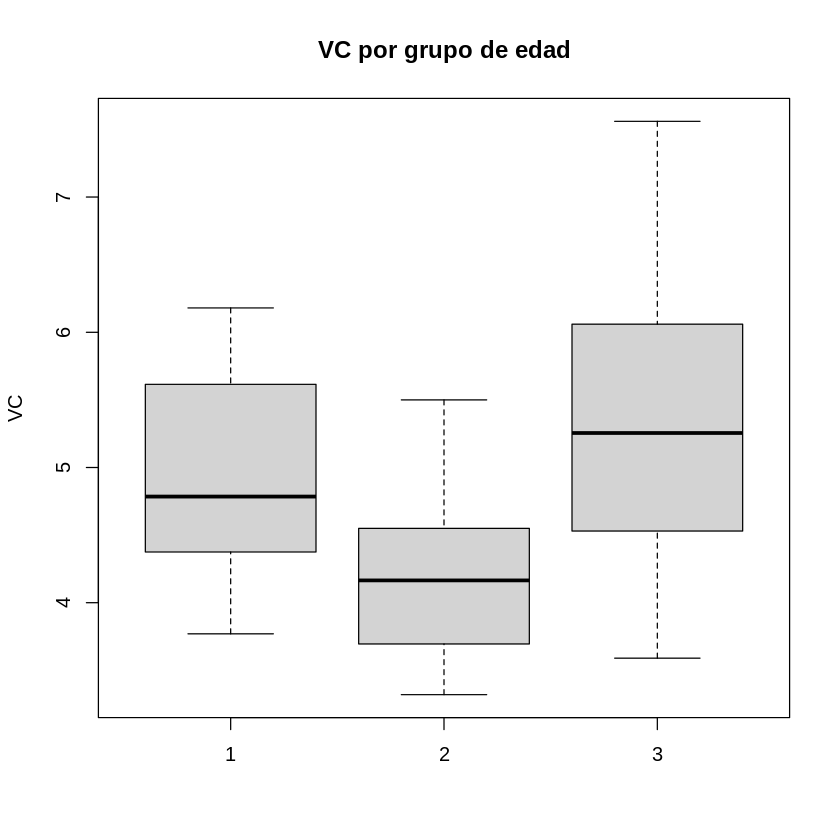

In [18]:
df.1 <- filter(df.casted, AGEGROUP=="1")
df.2 <- filter(df.casted, AGEGROUP=="2")
df.3 <- filter(df.casted, AGEGROUP=="3")

boxplot(df.1$VC, df.2$VC, df.3$VC, main="VC por grupo de edad", ylab="VC", names = c("1", "2", "3"))

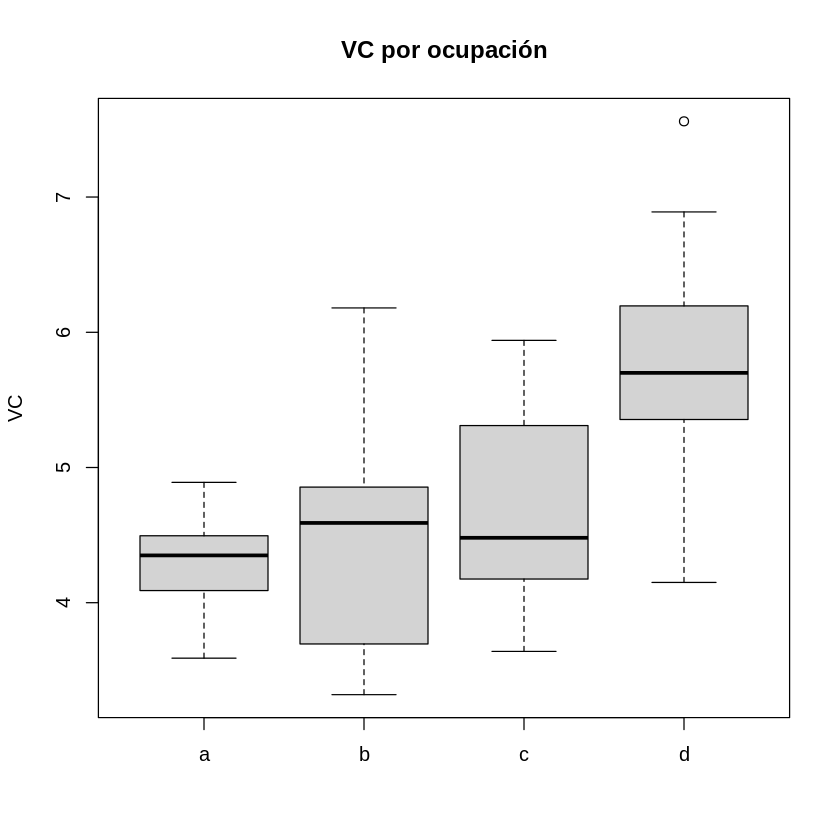

In [19]:
df.1 <- filter(df.casted, OCC=="a")
df.2 <- filter(df.casted, OCC=="b")
df.3 <- filter(df.casted, OCC=="c")
df.4 <- filter(df.casted, OCC=="d")

boxplot(df.1$VC, df.2$VC, df.3$VC, df.4$VC, main="VC por ocupación", ylab="VC", names = c("a", "b", "c", "d"))